# Brain Hemmorahage Detection

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout,BatchNormalization,MaxPool2D
from keras import models,optimizers
from keras.preprocessing.image import load_img,img_to_array
from keras.utils.vis_utils import plot_model

Using TensorFlow backend.


### Setting Directory for train,test and val data

In [7]:
train_directory=r'E:\CSE\6th sem\project\head_ct\train'
test_directory=r'E:\CSE\6th sem\project\head_ct\test'
val_directory=r'E:\CSE\6th sem\project\head_ct\val'

In [8]:
train_datagen=ImageDataGenerator(rescale=1/255)
val_datagen=ImageDataGenerator(rescale=1/255)

In [40]:
train_generator=train_datagen.flow_from_directory(train_directory,
                                                  target_size=(130,130),
                                                  class_mode='binary',
                                                  batch_size=32)

val_generator=val_datagen.flow_from_directory(val_directory,
                                             target_size=(130,130),
                                             class_mode='binary')


test_generator=val_datagen.flow_from_directory(test_directory,target_size=(130,130),class_mode='binary')

Found 3007 images belonging to 2 classes.
Found 381 images belonging to 2 classes.
Found 368 images belonging to 2 classes.


# Model

In [23]:
model=models.Sequential()
model.add(Conv2D(256,(1,1),input_shape=(130,130,3),activation='relu',kernel_initializer='he_uniform'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(256,(1,1),activation='relu',kernel_initializer='he_uniform'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(256,(1,1),activation='relu',kernel_initializer='he_uniform'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(256,(3,3),activation='relu',kernel_initializer='he_uniform'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(256,(3,3),activation='relu',kernel_initializer='he_uniform'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(256,(1,1),activation='relu',kernel_initializer='he_uniform'))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform',kernel_regularizer='l2'))
model.add(Dense(64,activation='relu',kernel_initializer='he_uniform',kernel_regularizer='l2'))
model.add(Dense(32,activation='relu',kernel_initializer='he_uniform',kernel_regularizer='l2'))
model.add(Dense(1,activation='sigmoid',kernel_regularizer='l2'))

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 130, 130, 256)     1024      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 65, 65, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 65, 65, 256)       65792     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 256)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 256)       65792     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 256)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 256)      

# Model Architecture

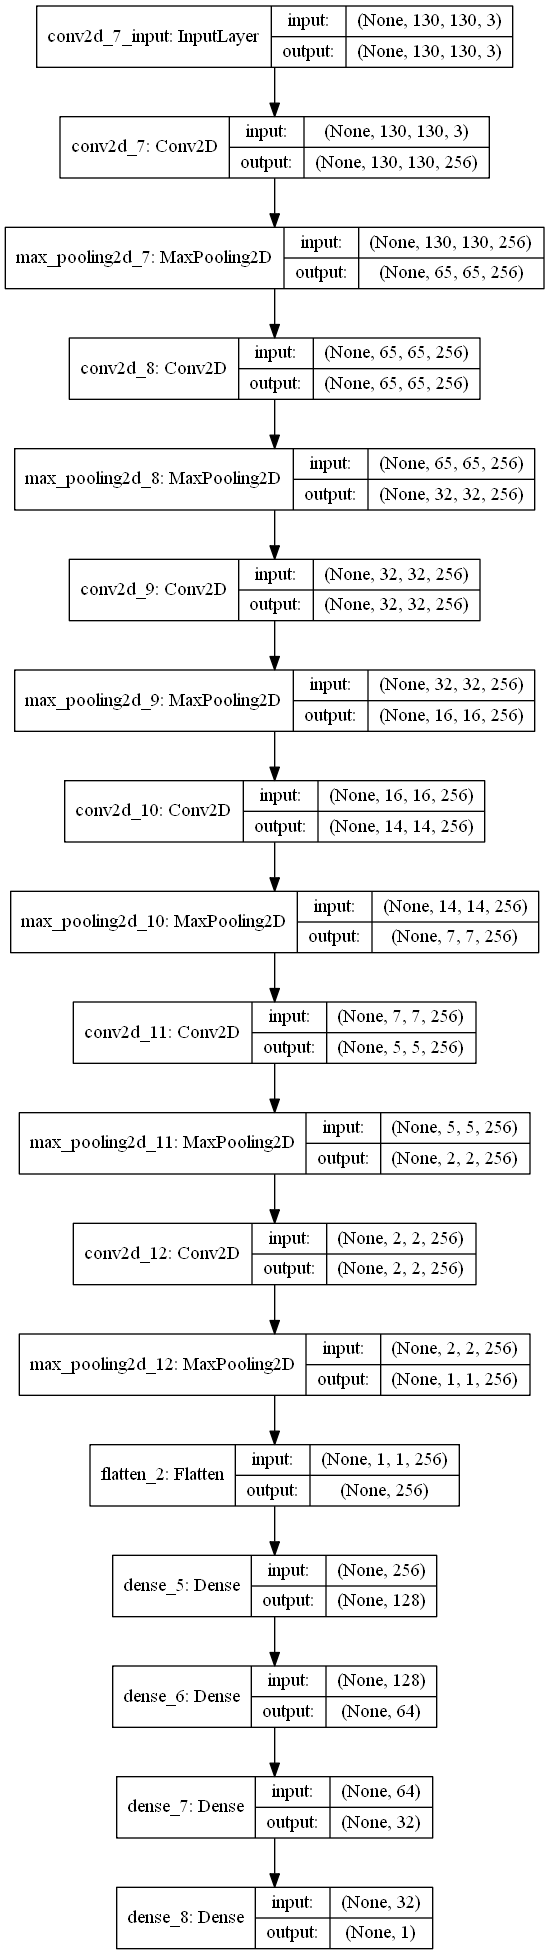

In [95]:
plot_model(model,show_shapes=True)

In [24]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [25]:
history=model.fit(train_generator,
                  epochs=7,
                  validation_data=val_generator)

Epoch 1/7
91/91 [==============================] - 19s 213ms/step - loss: 3.6554 - accuracy: 0.6180 - val_loss: 2.5182 - val_accuracy: 0.6640
Epoch 2/7
91/91 [==============================] - 19s 208ms/step - loss: 1.8911 - accuracy: 0.8010 - val_loss: 1.3593 - val_accuracy: 0.8862
Epoch 3/7
91/91 [==============================] - 19s 208ms/step - loss: 1.2533 - accuracy: 0.8662 - val_loss: 1.0229 - val_accuracy: 0.8148
Epoch 4/7
91/91 [==============================] - 19s 208ms/step - loss: 0.9290 - accuracy: 0.8974 - val_loss: 1.3074 - val_accuracy: 0.7857
Epoch 5/7
91/91 [==============================] - 19s 209ms/step - loss: 0.7214 - accuracy: 0.9217 - val_loss: 0.6097 - val_accuracy: 0.9233
Epoch 6/7
91/91 [==============================] - 19s 211ms/step - loss: 0.5916 - accuracy: 0.9399 - val_loss: 0.5003 - val_accuracy: 0.9524
Epoch 7/7
91/91 [==============================] - 19s 209ms/step - loss: 0.4847 - accuracy: 0.9542 - val_loss: 0.6614 - val_accuracy: 0.9444


# Accuracy and Loss Plot

In [35]:
def plot_accuracy_loss(history):
    """
        Plot the accuracy and the loss during the training of the nn.
    """
    fig = plt.figure(figsize=(20,10))

    # Plot accuracy
    plt.subplot(221)
    plt.plot(history.history['accuracy'],'bo--', label = "acc")
    plt.plot(history.history['val_accuracy'], 'ro--', label = "val_acc")
    plt.title("train_acc vs val_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    # Plot loss function
    plt.subplot(222)
    plt.plot(history.history['loss'],'bo--', label = "loss")
    plt.plot(history.history['val_loss'], 'ro--', label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()

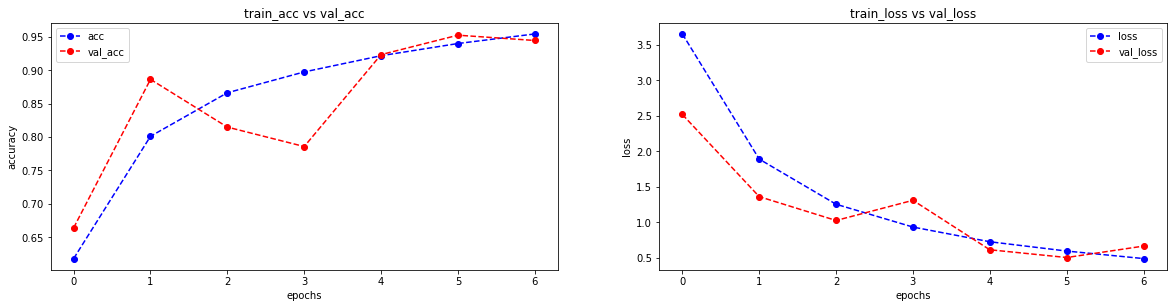

In [36]:
plot_accuracy_loss(history)

In [93]:
model.save('final.h5')

### Accuracy on test Data

In [28]:
model.evaluate(test_generator)

[0.3462666869163513, 0.9470899701118469]

# Confusion Matrix

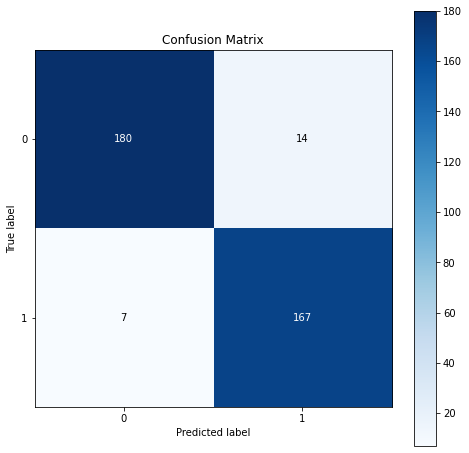

In [28]:
Y_pred = model.predict(test_generator)
skplt.metrics.plot_confusion_matrix(test_generator.classes,Y_pred,figsize=(8,8))

# Classification Report

In [30]:
print(classification_report(test_generator.classes,Y_pred,target_names=['Negative','Positive']))

              precision    recall  f1-score   support

    Negative       0.96      0.93      0.94       194
    Positive       0.92      0.96      0.94       174

    accuracy                           0.94       368
   macro avg       0.94      0.94      0.94       368
weighted avg       0.94      0.94      0.94       368



# Prediction

### Positive Cases

In [29]:
model=keras.models.load_model('final.h5',compile=False)

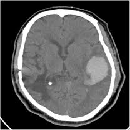

In [89]:
img=load_img(r'E:\CSE\6th sem\project\archive\hem.jpg',target_size=(130,130))
img

In [33]:
img=load_img('hem.jpg',target_size=(130,130))
img=img_to_array(img)
img=np.expand_dims(img,[0])
img=img/255
model.predict(img)

array([[0.736074]], dtype=float32)

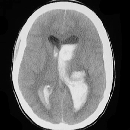

In [38]:
img=load_img('blood.jpg',target_size=(130,130))
img

In [39]:
img=img_to_array(img)
img=np.expand_dims(img,[0])
img=img/255
model.predict(img)

array([[0.9940069]], dtype=float32)

### Negative Cases

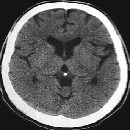

In [42]:
img=load_img('abc.png',target_size=(130,130))
img

In [43]:
img=img_to_array(img)
img=np.expand_dims(img,[0])
img=img/255
model.predict(img)

array([[0.28658158]], dtype=float32)

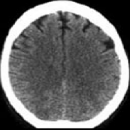

In [44]:
img=load_img('norm1.png',target_size=(130,130))
img

In [45]:
img=img_to_array(img)
img=np.expand_dims(img,[0])
img=img/255
model.predict(img)

array([[0.02099581]], dtype=float32)